# TOTAL

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
plt.figure(figsize=(6, 6))
plt.xlim(0, 9)
plt.ylim(0, 9)

square_x = [3, 5, 5, 3, 3]
square_y = [3, 3, 5, 5, 3]
plt.plot(square_x, square_y, 'b-', label='Square Region (Class 1)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("2x2 Square on Coordinate Plane ")
plt.grid(True)
plt.show()


## Problem-Solving( Step1 )

Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5041 - loss: 0.9020 - val_accuracy: 0.5000 - val_loss: 0.6672
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4793 - loss: 0.6729 - val_accuracy: 0.8100 - val_loss: 0.6074
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.6217 - val_accuracy: 0.8000 - val_loss: 0.5911
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7642 - loss: 0.6041 - val_accuracy: 0.8100 - val_loss: 0.5764
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.6044 - val_accuracy: 0.8100 - val_loss: 0.5638
Epoch 6/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.5830 - val_accuracy: 0.8400 - val_loss: 0.5504
Epoch 7/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.5788 - val_accuracy: 0.8350 - val_loss: 0.5384
Epoch 8/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7809 - loss: 0.5708 - val_accuracy: 0.8450 - val_los

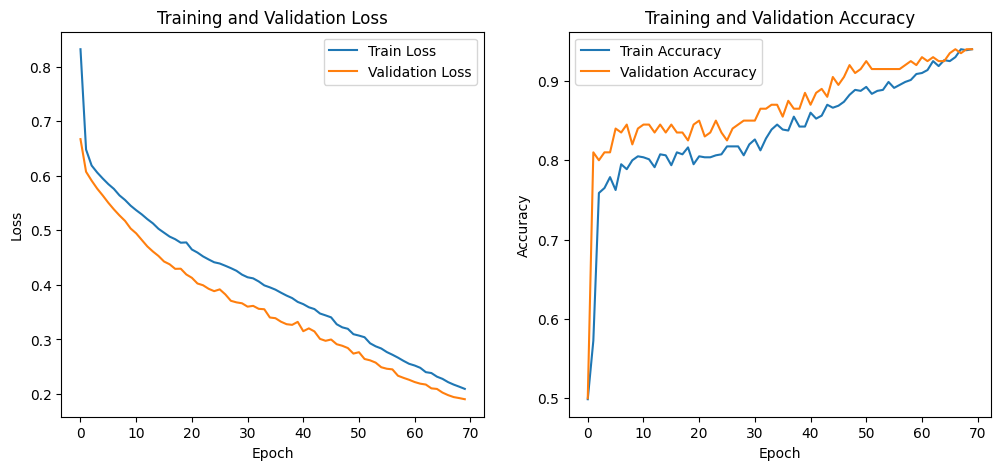

In [35]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the coordinate space limits and square boundary
space_limit = 9
square_min, square_max = 3, 5

# Generate data
num_samples_per_class = 500  # 500 samples for each class for balance
x1_data, x2_data, labels = [], [], []

# Generate Class 1 (inside the square)
for _ in range(num_samples_per_class):
    x1 = np.random.uniform(square_min, square_max)
    x2 = np.random.uniform(square_min, square_max)
    x1_data.append(x1)
    x2_data.append(x2)
    labels.append(1)  # Class 1

# Generate Class 0 (outside the square)
for _ in range(num_samples_per_class):
    while True:
        x1 = np.random.uniform(0, space_limit)
        x2 = np.random.uniform(0, space_limit)
        # Check if outside the square
        if not (square_min <= x1 <= square_max and square_min <= x2 <= square_max):
            x1_data.append(x1)
            x2_data.append(x2)
            labels.append(0)  # Class 0
            break

# Convert lists to numpy arrays
x1_data = np.array(x1_data)
x2_data = np.array(x2_data)
labels = np.array(labels)

# Stack x1 and x2 to create feature set
X_data = np.stack((x1_data, x2_data), axis=1)
y_data = labels

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Define an MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),         # Input layer with 2 features (x1, x2)
    tf.keras.layers.Dense(16, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70, verbose=1)

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



# Function to predict class for a user-given point
def predict_class(x1, x2):
    point = np.array([[x1, x2]])
    probability = model.predict(point)[0][0]  # Get the prediction probability
    predicted_class = 1 if probability >= 0.5 else 0
    print(f"The point ({x1}, {x2}) belongs to Class {predicted_class} with probability {probability:.2f}.")



In [36]:
6# Example usage
x1 = float(input("Enter x1 coordinate: "))
x2 = float(input("Enter x2 coordinate: "))
predict_class(x1, x2)


Enter x1 coordinate: 6
Enter x2 coordinate: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The point (6.0, 6.0) belongs to Class 1 with probability 0.60.


## Problem-Solving( Step2 )


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6038 - loss: 0.6594 - val_accuracy: 0.6300 - val_loss: 0.5878
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6740 - loss: 0.5823 - val_accuracy: 0.7300 - val_loss: 0.5023
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - loss: 0.4821 - val_accuracy: 0.8650 - val_loss: 0.4203
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8895 - loss: 0.4225 - val_accuracy: 0.9750 - val_loss: 0.3420
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.3420 - val_accuracy: 0.9900 - val_loss: 0.2644
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9967 - loss: 0.2450 - val_accuracy: 0.9850 - val_loss: 0.1897
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.1793 - val_accuracy: 0.9850 - val_loss: 0.1291
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.1231 - val_accuracy: 0.9850 - val_loss

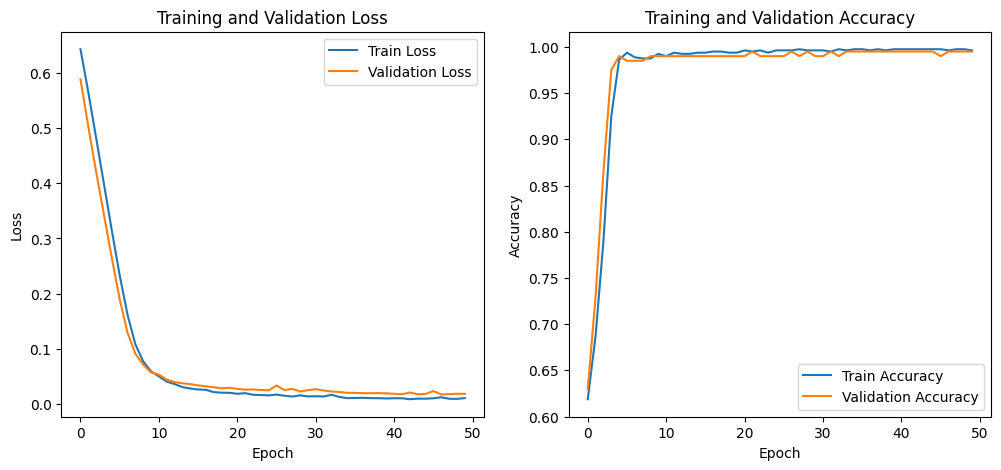

In [37]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the coordinate space limits and square boundary
space_limit = 9
square_min, square_max = 3, 5

# Generate data
num_samples_per_class = 500  # 500 samples for each class for balance
x1_data, x2_data, labels = [], [], []

# Generate Class 1 (inside the square)
for _ in range(num_samples_per_class):
    x1 = np.random.uniform(square_min, square_max)
    x2 = np.random.uniform(square_min, square_max)
    x1_data.append(x1)
    x2_data.append(x2)
    labels.append(1)  # Class 1

# Generate Class 0 (outside the square)
for _ in range(num_samples_per_class):
    while True:
        x1 = np.random.uniform(0, space_limit)
        x2 = np.random.uniform(0, space_limit)
        # Check if outside the square
        if not (square_min <= x1 <= square_max and square_min <= x2 <= square_max):
            x1_data.append(x1)
            x2_data.append(x2)
            labels.append(0)  # Class 0
            break

# Convert lists to numpy arrays
x1_data = np.array(x1_data)
x2_data = np.array(x2_data)
labels = np.array(labels)

# Stack x1 and x2 to create feature set
X_data = np.stack((x1_data, x2_data), axis=1)
y_data = labels

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define an MLP model with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),                # Input layer with 2 features (x1, x2)
    tf.keras.layers.Dense(32, activation='relu'),     # First hidden layer with 32 units
    tf.keras.layers.Dense(32, activation='relu'),     # Second hidden layer with 32 units
    tf.keras.layers.Dense(16, activation='relu'),     # Third hidden layer with 16 units
    tf.keras.layers.Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Function to predict class for a user-given point
def predict_class(x1, x2):
    point = np.array([[x1, x2]])
    point = scaler.transform(point)  # Normalize the input point
    probability = model.predict(point)[0][0]  # Get the prediction probability
    predicted_class = 1 if probability >= 0.5 else 0
    print(f"The point ({x1}, {x2}) belongs to Class {predicted_class} with probability {probability:.2f}.")



In [38]:
# Example usage
x1 = float(input("Enter x1 coordinate: "))
x2 = float(input("Enter x2 coordinate: "))
predict_class(x1, x2)

Enter x1 coordinate: 6
Enter x2 coordinate: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The point (6.0, 6.0) belongs to Class 0 with probability 0.00.
